In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from collections import Counter

2024-07-25 12:46:19.341766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Read and Prepare data

In [2]:
df = pd.read_csv('data/processed/train_1_processed.csv', index_col=None)

#### Select page

In [84]:
page_index = 86431

In [85]:
time_serie = df.loc[[page_index]]

In [86]:
time_serie = time_serie.fillna(0)

#### Select only time series columns

In [87]:
# Regular expression to match date format "YYYY-MM-DD"
date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')

# Filter columns based on the regular expression
filtered_columns = [col for col in time_serie.columns if date_pattern.match(col)]

# Create a new DataFrame with only the filtered columns
time_serie = time_serie[filtered_columns]

Save dates for plot later

In [88]:
date_columns = time_serie.columns

In [89]:
time_serie = time_serie.values.flatten()

#### Split training and test data

In [90]:
train_data, test_data = train_test_split(time_serie, test_size=0.2, shuffle=False)

In [91]:
print(train_data.shape)
print(test_data.shape)

(440,)
(110,)


#### Split Features and Labels

In [92]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [93]:
timesteps = 3
X_train, y_train = split_sequence(train_data, n_steps=timesteps)
X_test, y_test = split_sequence(test_data, n_steps=timesteps)

In [94]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(437, 3)
(437,)
(107, 3)
(107,)


In [110]:
# Split dates too
date_columns = np.array(date_columns)
train_dates = date_columns[:len(y_train)]
test_dates = date_columns[len(y_train)-3:len(y_train)-3 + len(y_test)]

In [111]:
len(test_dates)

107

In [97]:
sc = MinMaxScaler()
X_train_shape = X_train.shape[0]
X_test_shape = X_test.shape[0]

X_train = np.reshape(X_train,(-1,1))
y_train = np.reshape(y_train,(-1,1))

X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

n_features = 1
X_train = np.reshape(X_train, (X_train_shape, timesteps, n_features))
X_test = np.reshape(X_test, (X_test_shape, timesteps, n_features))

In [98]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(437, 3, 1)
(437, 1)
(107, 3, 1)
(107,)


In [99]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(None, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/Users/marcopellegrino/miniconda3/envs/marcoenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0690
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0491 
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0346 
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230 
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 
Epoch

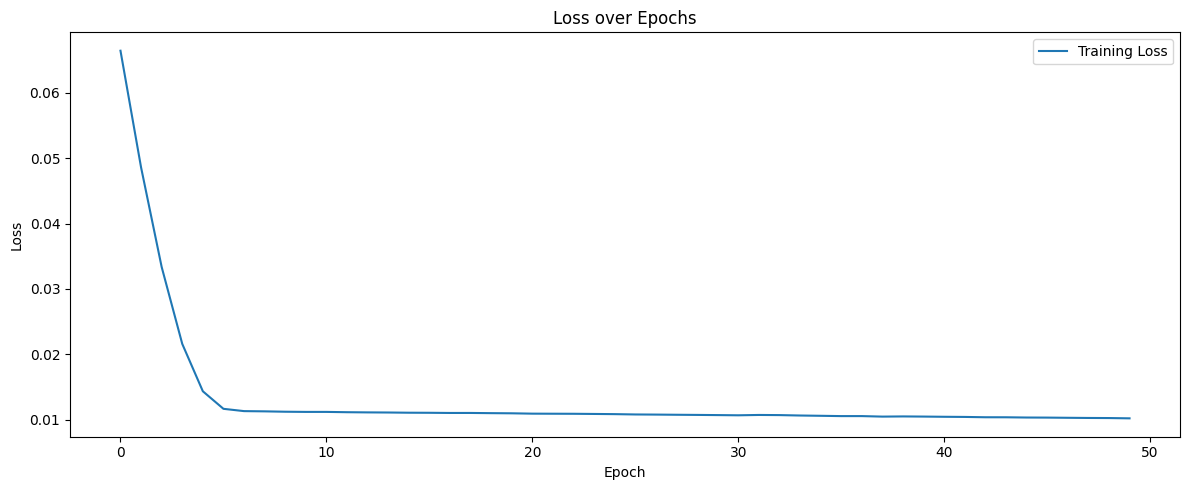

In [100]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Extract training and validation loss and accuracy from the history object
loss = history.history['loss']
val_loss = history.history.get('val_loss')
val_accuracy = history.history.get('val_accuracy')

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.plot(loss, label='Training Loss')
if val_loss:
    plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [101]:
# Normalize test set for prediction
X_test_normalized = X_test
X_test_normalized = np.reshape(X_test_normalized,(-1,1))
X_test_normalized = sc.transform(X_test_normalized)
X_test_normalized = np.reshape(X_test_normalized, (X_test_shape, timesteps, n_features))

In [102]:
len(X_test_normalized)

107

In [103]:
y_pred_normalized = model.predict(X_test_normalized)
y_pred = sc.inverse_transform(y_pred_normalized)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x1492e4b80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [104]:
len(y_pred)

107

In [105]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2949218915.386509


In [106]:
# Convert the date columns to datetime format
test_dates = pd.to_datetime(test_dates)
#test_dates = test_dates[timesteps:]  # Adjust dates to match the test period

In [107]:
len(test_dates)

104

In [108]:
len(y_test.flatten())

107

In [112]:
# Creating a DataFrame for test dates and predicted values
results_df = pd.DataFrame({
    'Date': test_dates,  # Dates corresponding to the test period
    'Actual': y_test.flatten(),  # Flatten to ensure 1-dimensional
    'Predicted': y_pred.flatten()  # Flatten to ensure 1-dimensional
})

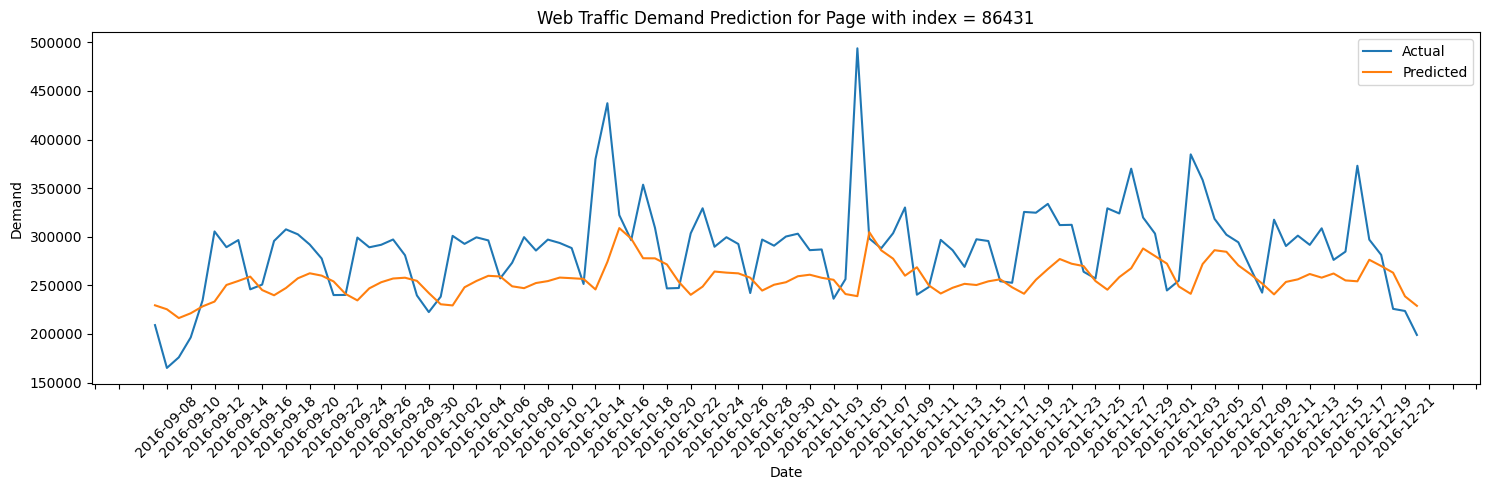

In [114]:
plt.figure(figsize=(15, 5))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual')
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted')
plt.title(f'Web Traffic Demand Prediction for Page with index = {page_index}')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()

# Set major ticks to be every 2 days
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Rotate and format the date labels
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()